In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/cifar10/naive

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 223 (delta 0), reused 0 (delta 0), pack-reused 206 (from 1)
Receiving objects: 100% (223/223), 58.98 MiB | 33.93 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/kaggle/working/machine_unlearning_experiments/experiments/cifar10/naive


## Dependecies

In [2]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.resnet50 import init_model_resnet50

Device used: cuda


## Parameters (arbitrary chosen)

In [5]:
BATCH_SIZE = 128
LEARNING_RATE = 5e-5
EPOCHS = 5

# Simple base training

## Init model

In [6]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(learning_rate=LEARNING_RATE, fc_output=10)

Init model...


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 194MB/s]


Done initializing model.
Model ID: 135352988577904, Optimizer ID: 135352988574256, Criterion ID: 135353676644304


## Init dataloaders

In [7]:
train_dataset = datasets.CIFAR10(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root=data_root, train=False, transform=transform, download=True)
data_split_path = 'cifar10_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(train_dataset, test_dataset), 
    val_ratio=0.2,
    batch_size=BATCH_SIZE,
    info_file_path = data_split_path, 
    )

100%|██████████| 170498071/170498071 [00:03<00:00, 49172044.16it/s]


Extracting /kaggle/working/machine_unlearning_experiments/data/cifar-10-python.tar.gz to /kaggle/working/machine_unlearning_experiments/data
Files already downloaded and verified
Prepare DataLoaders...
Done preparing DataLoaders.


## Call train

In [8]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Evaluating on validation set...: 100%|██████████| 79/79 [00:33<00:00,  2.35it/s]


Epoch [1/5], Train Loss: 0.6309, Train Accuracy: 0.8211, Val Loss: 0.1734, Val Accuracy: 0.9443
Epoch 1: New best validation accuracy: 0.9443. Model saved to ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 79/79 [00:33<00:00,  2.32it/s]


Epoch [2/5], Train Loss: 0.1037, Train Accuracy: 0.9691, Val Loss: 0.1401, Val Accuracy: 0.9547
Epoch 2: New best validation accuracy: 0.9547. Model saved to ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 79/79 [00:33<00:00,  2.37it/s]


Epoch [3/5], Train Loss: 0.0304, Train Accuracy: 0.9921, Val Loss: 0.1420, Val Accuracy: 0.9577
Epoch 3: New best validation accuracy: 0.9577. Model saved to ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 79/79 [00:33<00:00,  2.36it/s]


Epoch [4/5], Train Loss: 0.0146, Train Accuracy: 0.9963, Val Loss: 0.1676, Val Accuracy: 0.9546


Evaluating on validation set...: 100%|██████████| 79/79 [00:33<00:00,  2.37it/s]

Epoch [5/5], Train Loss: 0.0130, Train Accuracy: 0.9962, Val Loss: 0.1698, Val Accuracy: 0.9556
Training complete for ResNet50_CIFAR10. Training stats saved to 'ResNet50_CIFAR10_history.json'.


## Plot history losses

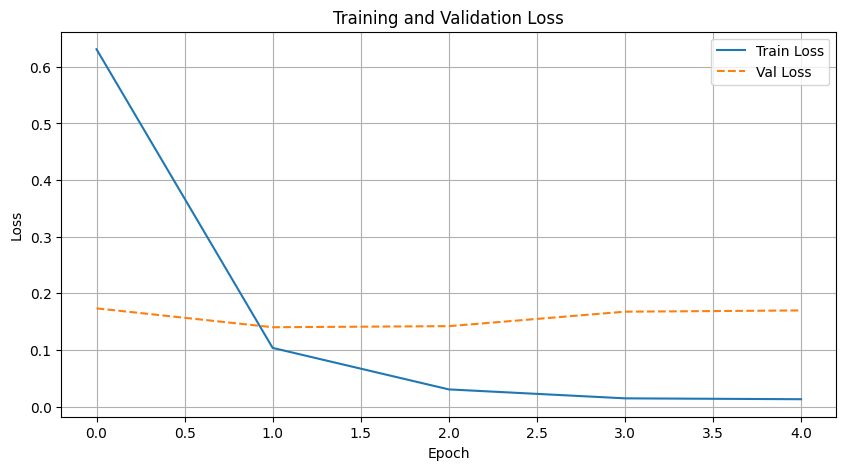

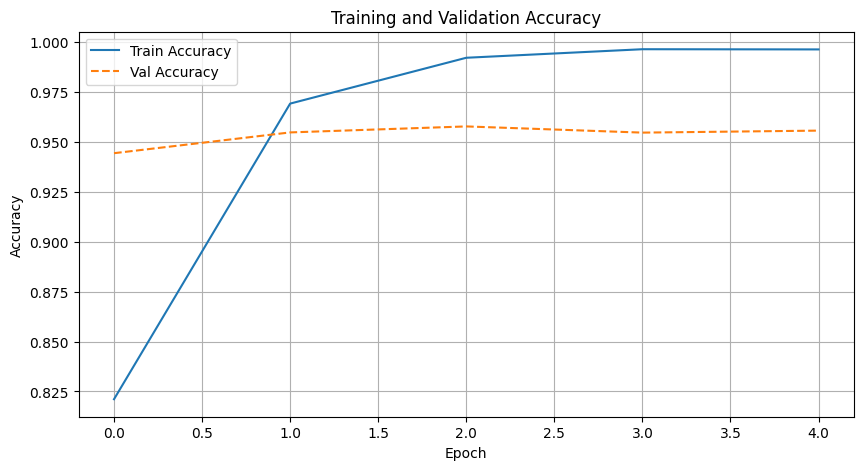

In [9]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [10]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: ResNet50_CIFAR10


Evaluating model: ResNet50_CIFAR10_model.pth: 100%|██████████| 79/79 [00:33<00:00,  2.34it/s]

Predictions and labels saved to ResNet50_CIFAR10_predictions.json


## Show metrics

Metrics for ResNet50_CIFAR10:
  - Test Accuracy: 0.9558
  - Precision: 0.9559
  - Recall: 0.9558
  - F1 Score: 0.9558


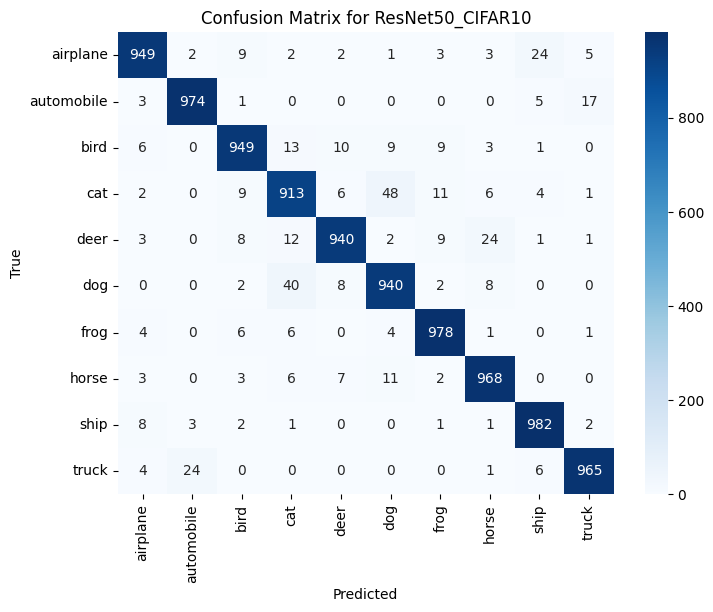

In [11]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [12]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [13]:
data_splits_file = "cifar10_data_splits.json"
unlearn_samples_file = "cifar10_samples_to_unlearn.json"
updated_data_splits_path = "updated_cifar10_data_splits.json"

In [14]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(learning_rate=LEARNING_RATE, fc_output=10)
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 135352983527168, Optimizer ID: 135352978744000, Criterion ID: 135352978747552


### Init data

In [15]:
dataset = datasets.CIFAR10(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root=data_root, train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


## Select samples to unlearn

In [16]:
#ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.1)

Unlearn indices saved to cifar10_samples_to_unlearn.json


## Update data splits -> delete samples

In [17]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to updated_cifar10_data_splits.json


## Recreate DataLoaders from json files

In [18]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset), 
    batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [19]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Evaluating on validation set...: 100%|██████████| 71/71 [00:27<00:00,  2.54it/s]


Epoch [1/5], Train Loss: 0.6700, Train Accuracy: 0.8086, Val Loss: 0.1858, Val Accuracy: 0.9401
Epoch 1: New best validation accuracy: 0.9401. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 71/71 [00:27<00:00,  2.55it/s]


Epoch [2/5], Train Loss: 0.1135, Train Accuracy: 0.9653, Val Loss: 0.1430, Val Accuracy: 0.9527
Epoch 2: New best validation accuracy: 0.9527. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 71/71 [00:27<00:00,  2.57it/s]


Epoch [3/5], Train Loss: 0.0370, Train Accuracy: 0.9892, Val Loss: 0.1399, Val Accuracy: 0.9546
Epoch 3: New best validation accuracy: 0.9546. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 71/71 [00:27<00:00,  2.56it/s]


Epoch [4/5], Train Loss: 0.0147, Train Accuracy: 0.9964, Val Loss: 0.1447, Val Accuracy: 0.9564
Epoch 4: New best validation accuracy: 0.9564. Model saved to naive_unlearning_ResNet50_CIFAR10_model.pth.


Evaluating on validation set...: 100%|██████████| 71/71 [00:27<00:00,  2.60it/s]

Epoch [5/5], Train Loss: 0.0133, Train Accuracy: 0.9962, Val Loss: 0.1656, Val Accuracy: 0.9536
Training complete for naive_unlearning_ResNet50_CIFAR10. Training stats saved to 'naive_unlearning_ResNet50_CIFAR10_history.json'.


## Plot history losses

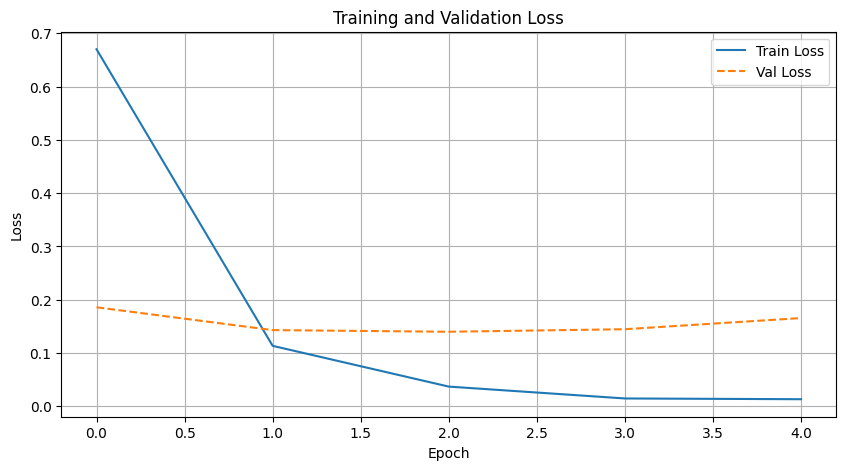

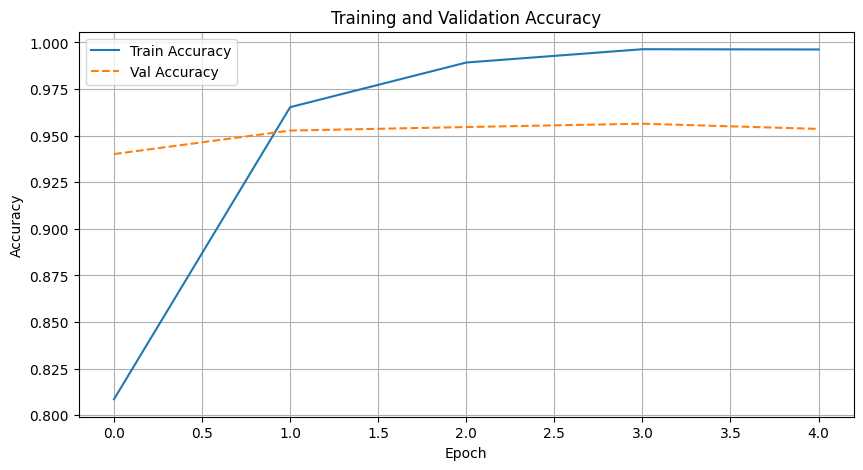

In [20]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [21]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_ResNet50_CIFAR10


Evaluating model: naive_unlearning_ResNet50_CIFAR10_model.pth: 100%|██████████| 79/79 [00:30<00:00,  2.56it/s]

Predictions and labels saved to naive_unlearning_ResNet50_CIFAR10_predictions.json


## Show metrics

Metrics for naive_unlearning_ResNet50_CIFAR10:
  - Test Accuracy: 0.9559
  - Precision: 0.9560
  - Recall: 0.9559
  - F1 Score: 0.9559


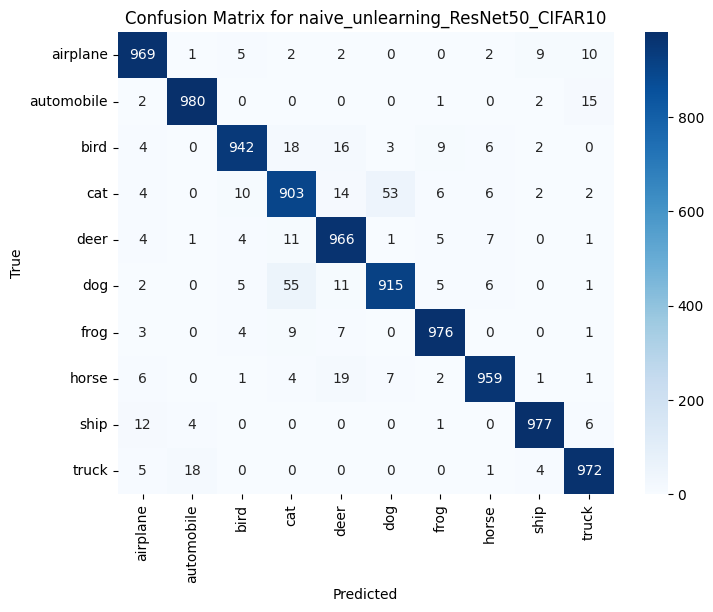

In [22]:
predictions_path = f'{model_name}_predictions.json'
show_metrics(predictions_path, classes, model_name)